# Library

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data

In [2]:
df = pd.read_csv('./Data/eoraptor.csv')
df.head(3)

,case,site,sex,age,head_length,skull_width,total_length,tail_length,foot_length,earconch,eye,chest,belly
0,1,1,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   case          104 non-null    int64  
 1   site          104 non-null    int64  
 2   sex           104 non-null    object 
 3   age           102 non-null    float64
 4   head_length   104 non-null    float64
 5   skull_width   104 non-null    float64
 6   total_length  104 non-null    float64
 7   tail_length   104 non-null    float64
 8   foot_length   103 non-null    float64
 9   earconch      104 non-null    float64
 10  eye           104 non-null    float64
 11  chest         104 non-null    float64
 12  belly         104 non-null    float64
dtypes: float64(10), int64(2), object(1)
memory usage: 10.7+ KB


In [4]:
df.drop('case', axis= 1, inplace= True)
df.head(3)

,site,sex,age,head_length,skull_width,total_length,tail_length,foot_length,earconch,eye,chest,belly
0,1,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0


## Conversion of Units

In [5]:
df['head_length'] = df['head_length'] / 10
df['skull_width'] = df['skull_width'] / 10
df['foot_length'] = df['foot_length'] / 10
df['earconch'] = df['earconch'] / 10
df['eye'] = df['eye'] / 10

df.head(3)

,site,sex,age,head_length,skull_width,total_length,tail_length,foot_length,earconch,eye,chest,belly
0,1,m,8.0,9.41,6.04,89.0,36.0,7.45,5.45,1.52,28.0,36.0
1,1,f,6.0,9.25,5.76,91.5,36.5,7.25,5.12,1.60,28.5,33.0
2,1,f,6.0,9.40,6.00,95.5,39.0,7.54,5.19,1.55,30.0,34.0


# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   site          104 non-null    int64  
 1   sex           104 non-null    object 
 2   age           102 non-null    float64
 3   head_length   104 non-null    float64
 4   skull_width   104 non-null    float64
 5   total_length  104 non-null    float64
 6   tail_length   104 non-null    float64
 7   foot_length   103 non-null    float64
 8   earconch      104 non-null    float64
 9   eye           104 non-null    float64
 10  chest         104 non-null    float64
 11  belly         104 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 9.9+ KB


In [7]:
df.head(3)

,site,sex,age,head_length,skull_width,total_length,tail_length,foot_length,earconch,eye,chest,belly
0,1,m,8.0,9.41,6.04,89.0,36.0,7.45,5.45,1.52,28.0,36.0
1,1,f,6.0,9.25,5.76,91.5,36.5,7.25,5.12,1.60,28.5,33.0
2,1,f,6.0,9.40,6.00,95.5,39.0,7.54,5.19,1.55,30.0,34.0


## Outlier

In [8]:
num_index = df.iloc[:,2:].columns
print('num index :',len(num_index))
num_index

num index : 10


Index(['age', 'head_length', 'skull_width', 'total_length', 'tail_length',
       'foot_length', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

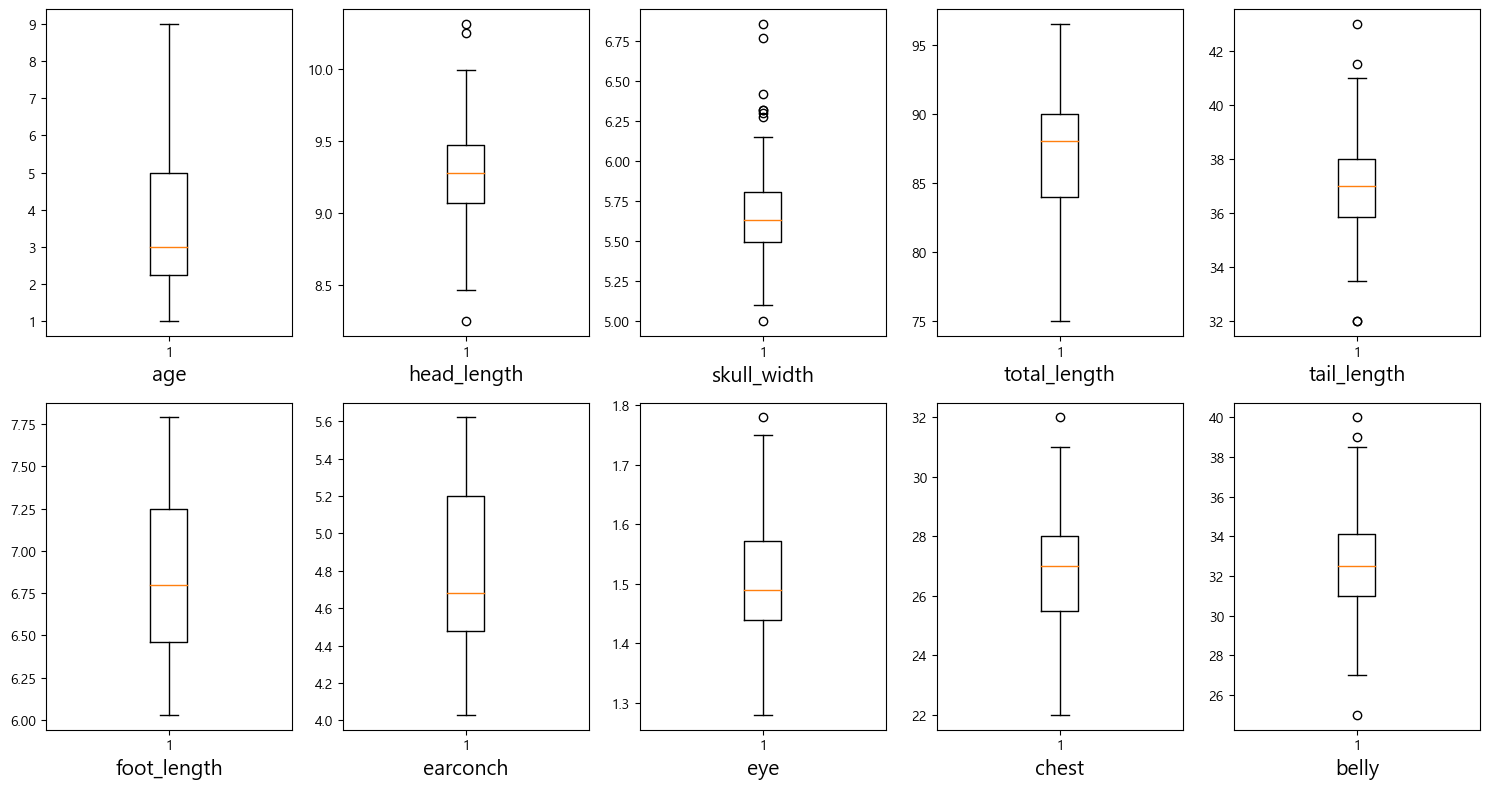

In [9]:
plt.figure(figsize= (15,8))

for i in range(10) :
    plt.subplot(2,5,i+1)
    plt.boxplot(df[num_index[i]].dropna(axis= 0))
    plt.xlabel(num_index[i], fontsize= 15)
    plt.yticks(fontsize= 10)
    plt.tight_layout()
    
plt.show()

In [10]:
df.describe()

,site,age,head_length,skull_width,total_length,tail_length,foot_length,earconch,eye,chest,belly
count,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,3.625000,3.833333,9.260288,5.688365,87.088462,37.009615,6.845922,4.813077,1.504615,27.000000,32.586538
std,2.349086,1.909244,0.357335,0.311343,4.310549,1.959518,0.439531,0.410938,0.105037,2.045597,2.761949
min,1.000000,1.000000,8.250000,5.000000,75.000000,32.000000,6.030000,4.030000,1.280000,22.000000,25.000000
25%,1.000000,2.250000,9.067500,5.497500,84.000000,35.875000,6.460000,4.480000,1.440000,25.500000,31.000000
50%,3.000000,3.000000,9.280000,5.635000,88.000000,37.000000,6.800000,4.680000,1.490000,27.000000,32.500000
75%,6.000000,5.000000,9.472500,5.810000,90.000000,38.000000,7.250000,5.200000,1.572500,28.000000,34.125000
max,7.000000,9.000000,10.310000,6.860000,96.500000,43.000000,7.790000,5.620000,1.780000,32.000000,40.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x22cdf3e2050>,
 'caps': [<matplotlib.lines.Line2D at 0x22cdf3e2590>,
 'boxes': [<matplotlib.lines.Line2D at 0x22cdf3e0c10>],
 'medians': [<matplotlib.lines.Line2D at 0x22cdf3e2ad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x22cdf3e2d70>],
 'means': []}

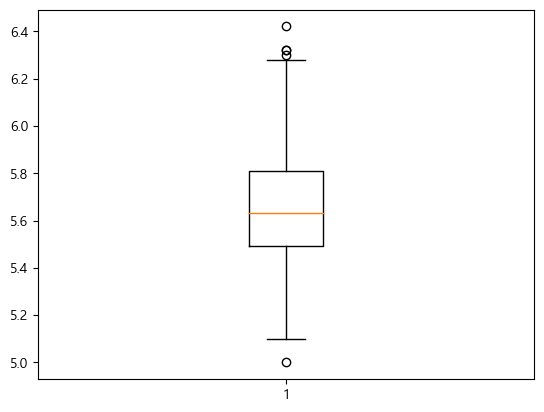

In [11]:
cond = df['skull_width'] < df['skull_width'].mean() + (3 * df['skull_width'].std())
df = df[cond]

plt.boxplot(df['skull_width'])

## Distribution

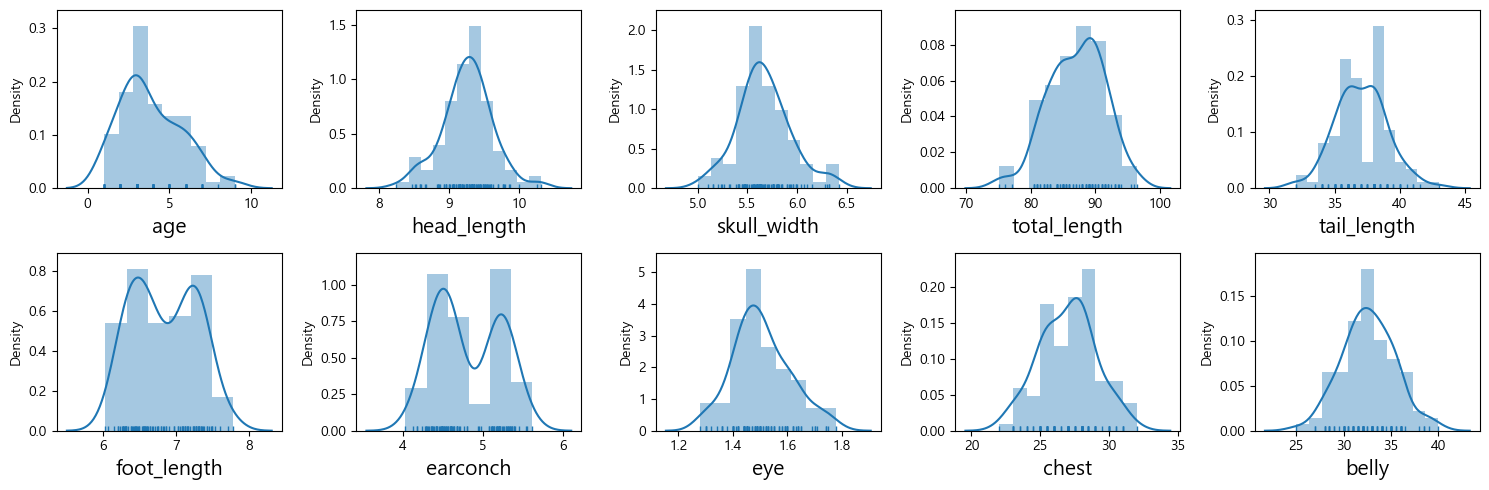

In [12]:
plt.figure(figsize= (15,5))

for i in range(10) :
    plt.subplot(2,5,i+1)
    sns.distplot(df[num_index[i]], hist= True, rug= True)
    plt.xlabel(num_index[i], fontsize= 15)
    plt.xticks(fontsize= 10)
    plt.yticks(fontsize= 10)
    plt.tight_layout()
    
plt.show()   

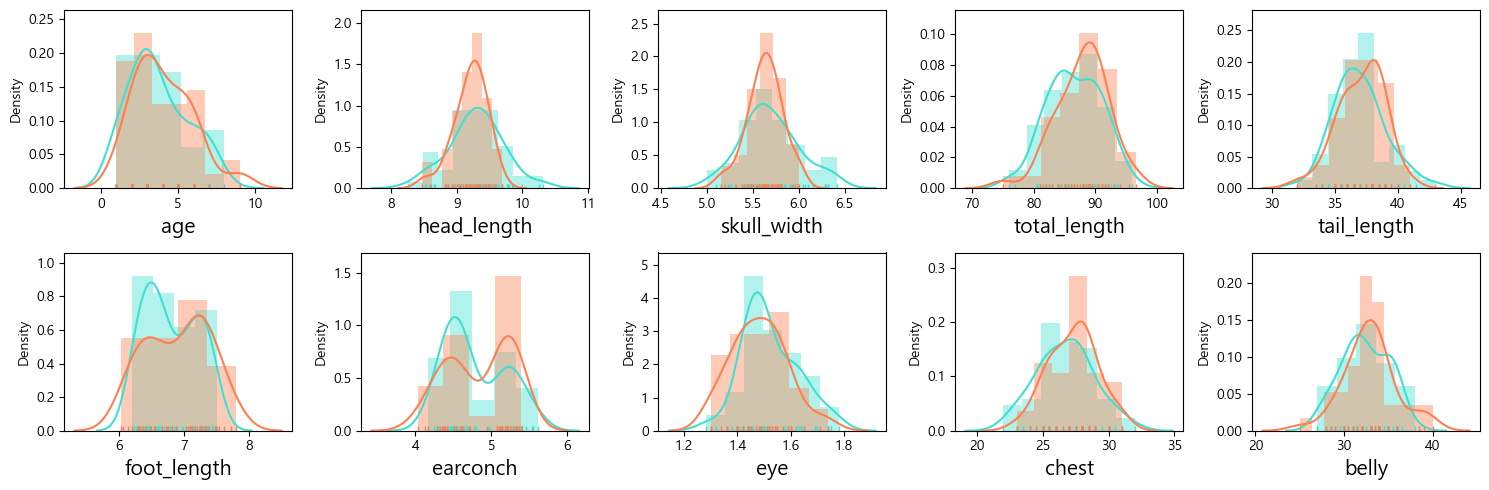

In [13]:
df_m = df[df['sex'] == 'm']
df_f = df[df['sex'] == 'f']

plt.figure(figsize= (15,5))

for i in range(10) :
    plt.subplot(2,5,i+1)
    sns.distplot(df_m[num_index[i]], hist= True, rug= True, color= 'turquoise')
    sns.distplot(df_f[num_index[i]], hist= True, rug= True, color= 'coral')
    plt.xlabel(num_index[i], fontsize= 15)
    plt.xticks(fontsize= 10)
    plt.yticks(fontsize= 10)
    plt.tight_layout()
    
plt.show()   

In [14]:
df['sex'].value_counts()

m    60
f    42
Name: sex, dtype: int64

## Categorical Features

In [15]:
df.head(3)

,site,sex,age,head_length,skull_width,total_length,tail_length,foot_length,earconch,eye,chest,belly
0,1,m,8.0,9.41,6.04,89.0,36.0,7.45,5.45,1.52,28.0,36.0
1,1,f,6.0,9.25,5.76,91.5,36.5,7.25,5.12,1.60,28.5,33.0
2,1,f,6.0,9.40,6.00,95.5,39.0,7.54,5.19,1.55,30.0,34.0


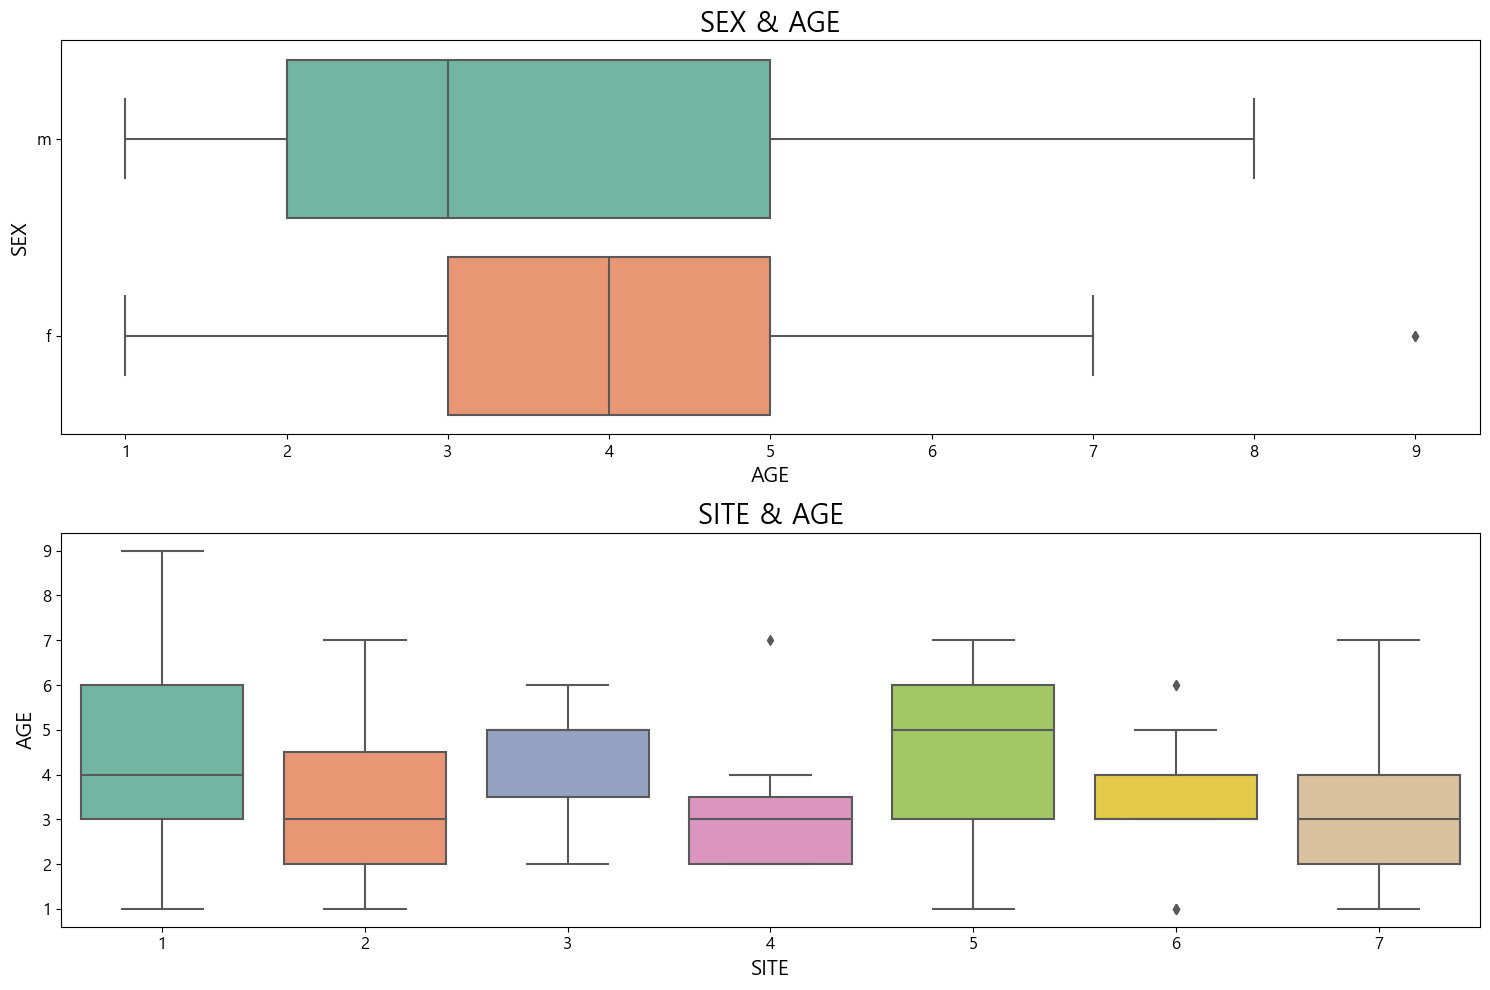

In [16]:
plt.figure(figsize= (15,10))
sns.set_palette('Set2')

plt.subplot(2,1,1)
plt.title('SEX & AGE', size= 20)
sns.boxplot(x= 'age', y= 'sex', data= df)
plt.xlabel('AGE', fontsize= 15)
plt.ylabel('SEX', fontsize= 15)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.subplot(2,1,2)
plt.title('SITE & AGE', size= 20)
sns.boxplot(x= 'site', y= 'age', data= df)
plt.xlabel('SITE', fontsize= 15)
plt.ylabel('AGE', fontsize= 15)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.tight_layout()
plt.show()

## Correlation

### Type Conversion

In [17]:
df = df.astype({'site':'category',
                'sex':'category'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   site          102 non-null    category
 1   sex           102 non-null    category
 2   age           100 non-null    float64 
 3   head_length   102 non-null    float64 
 4   skull_width   102 non-null    float64 
 5   total_length  102 non-null    float64 
 6   tail_length   102 non-null    float64 
 7   foot_length   101 non-null    float64 
 8   earconch      102 non-null    float64 
 9   eye           102 non-null    float64 
 10  chest         102 non-null    float64 
 11  belly         102 non-null    float64 
dtypes: category(2), float64(10)
memory usage: 9.4 KB


### Heatmap

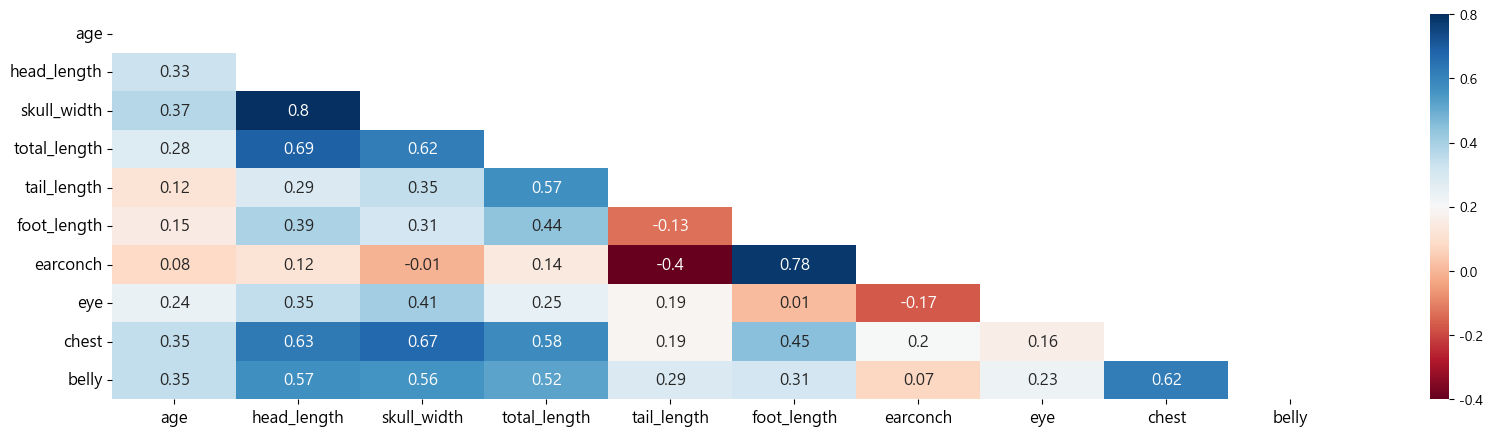

In [18]:
df = df.reindex(columns= ['age','site','sex','head_length','skull_width','total_length','tail_length','foot_length','earconch','eye','chest','belly'])

mask = np.triu(df.corr())

plt.figure(figsize= (20,5))

sns.heatmap(df.corr().round(2), annot= True, annot_kws= {'size':12}, cmap= 'RdBu', mask= mask)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)

plt.show()

In [19]:
df.drop('earconch', axis= 1, inplace= True)
df.head(3)

,age,site,sex,head_length,skull_width,total_length,tail_length,foot_length,eye,chest,belly
0,8.0,1,m,9.41,6.04,89.0,36.0,7.45,1.52,28.0,36.0
1,6.0,1,f,9.25,5.76,91.5,36.5,7.25,1.60,28.5,33.0
2,6.0,1,f,9.40,6.00,95.5,39.0,7.54,1.55,30.0,34.0


### Scatter Plot

<Figure size 1500x1000 with 0 Axes>

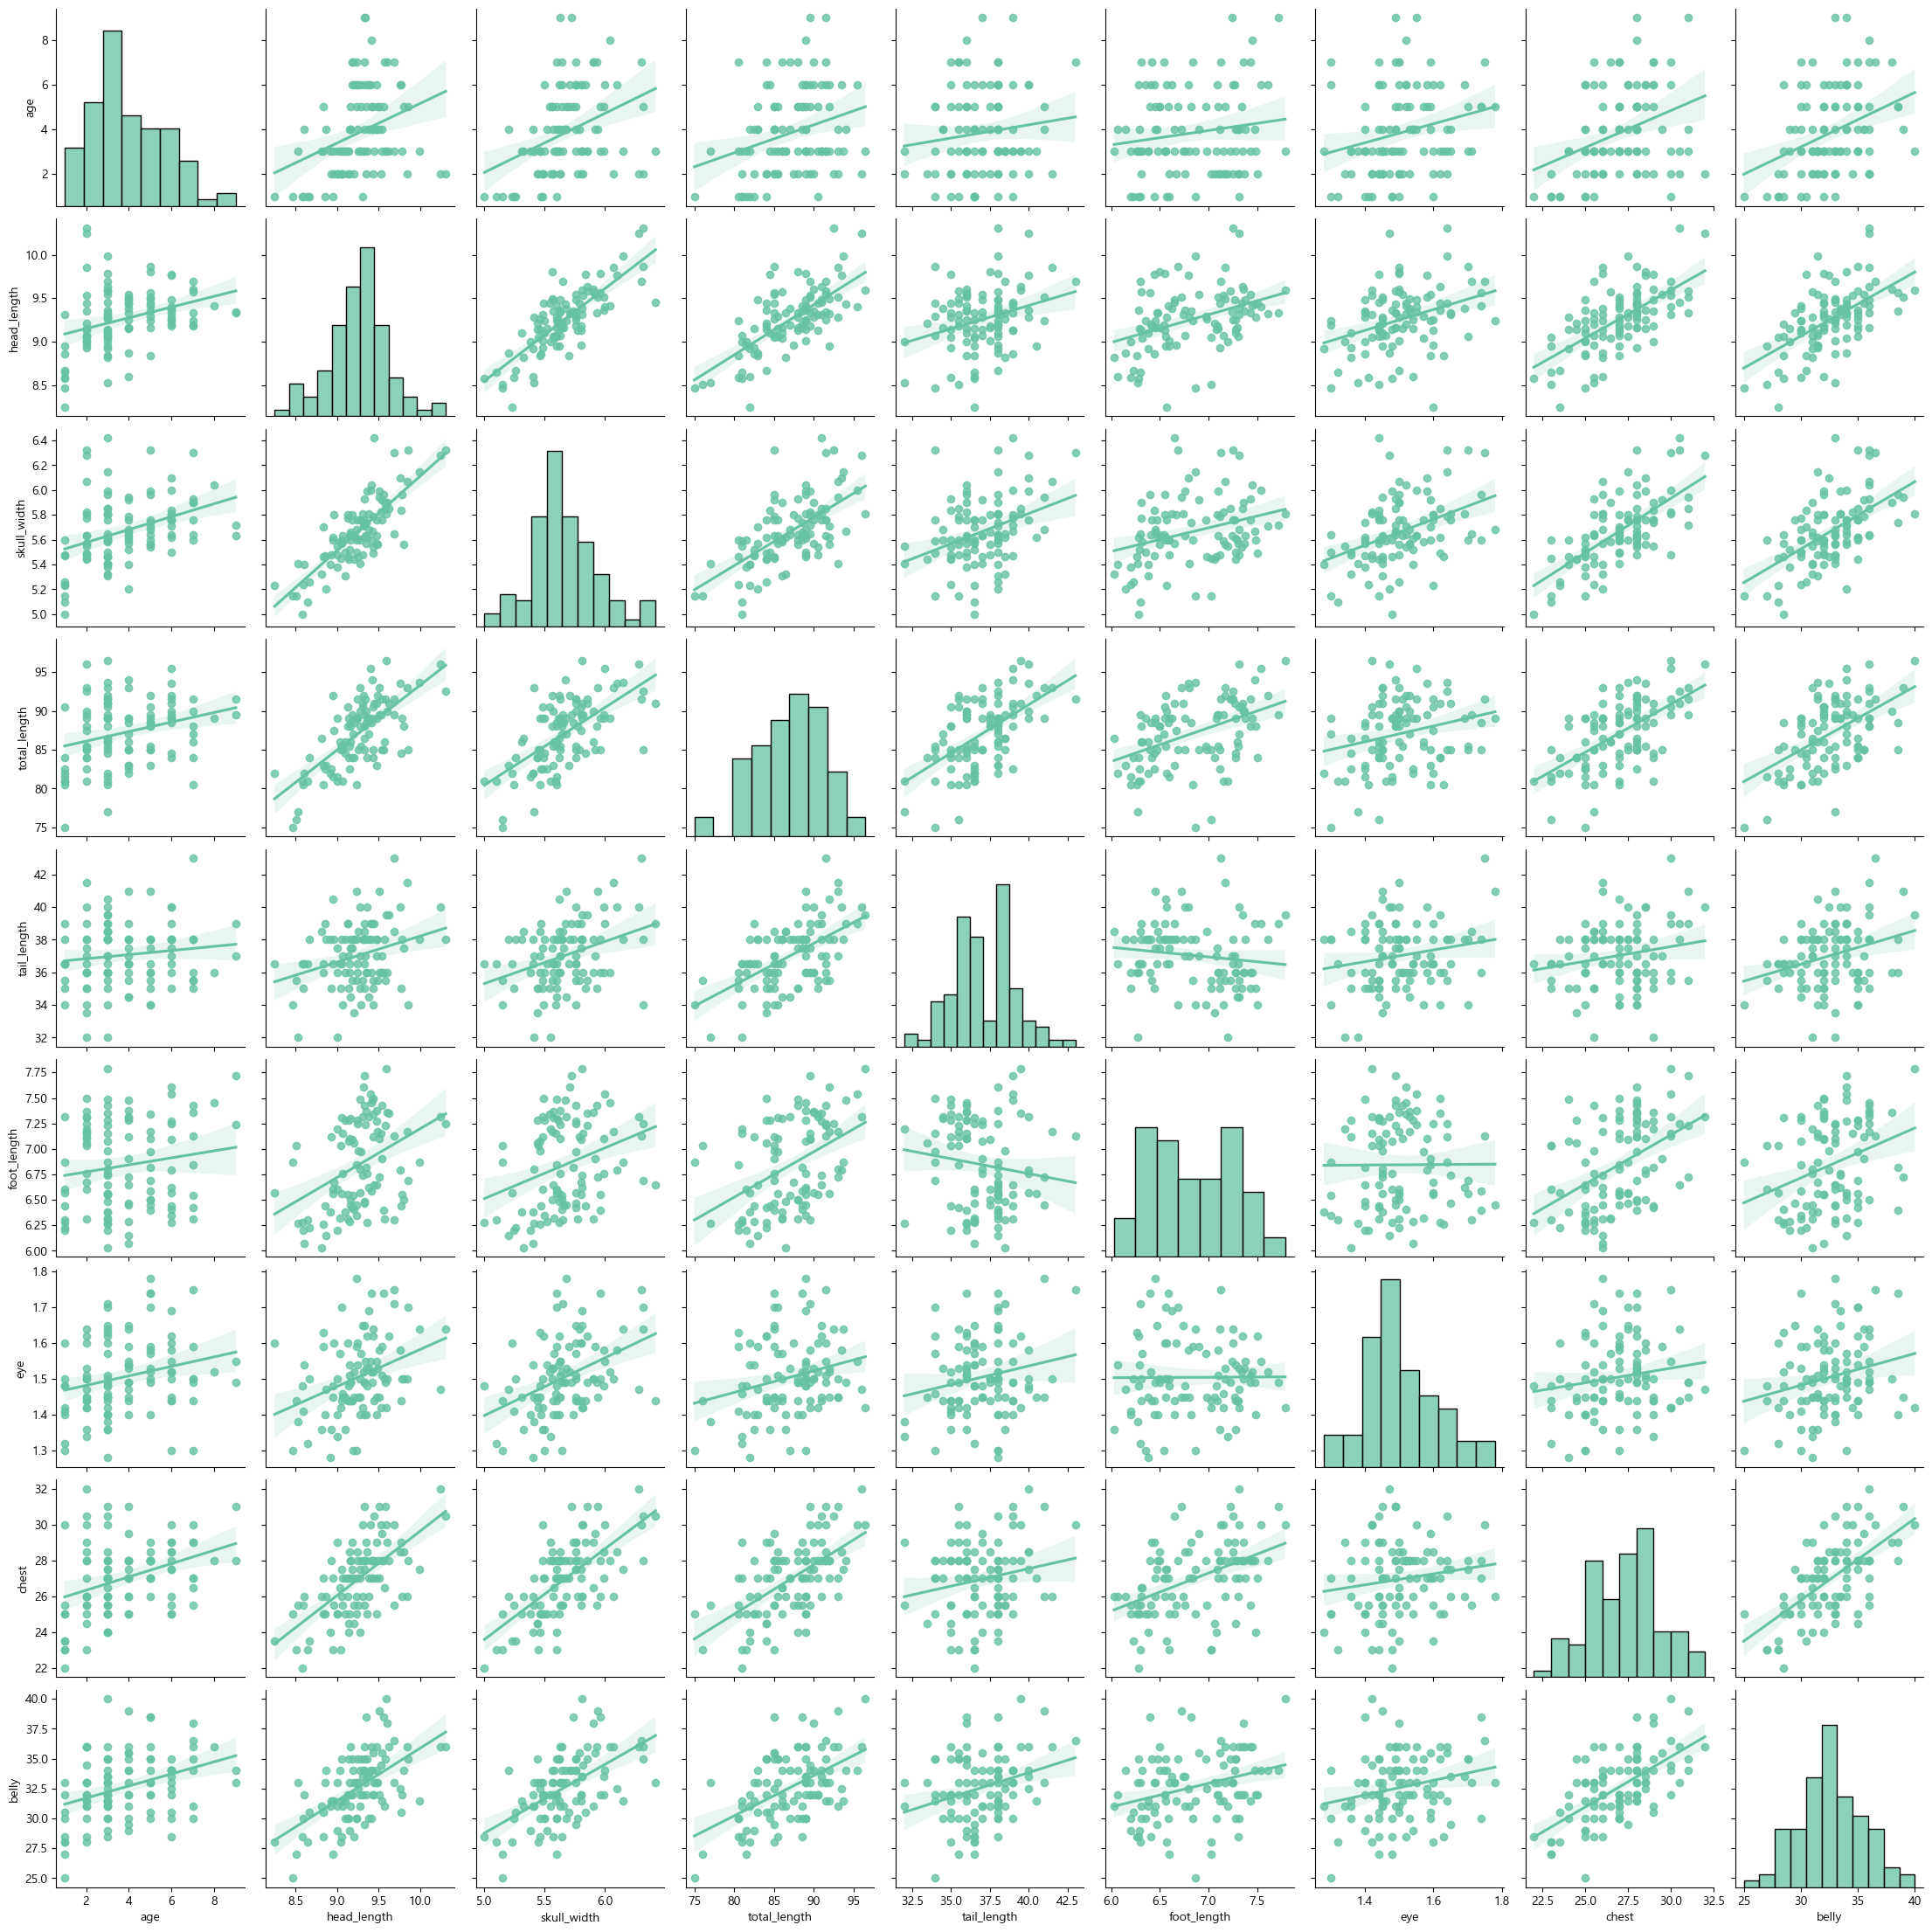

In [20]:
plt.figure(figsize= (15,10))

sns.pairplot(df, kind= 'reg')

#### head_length & Features

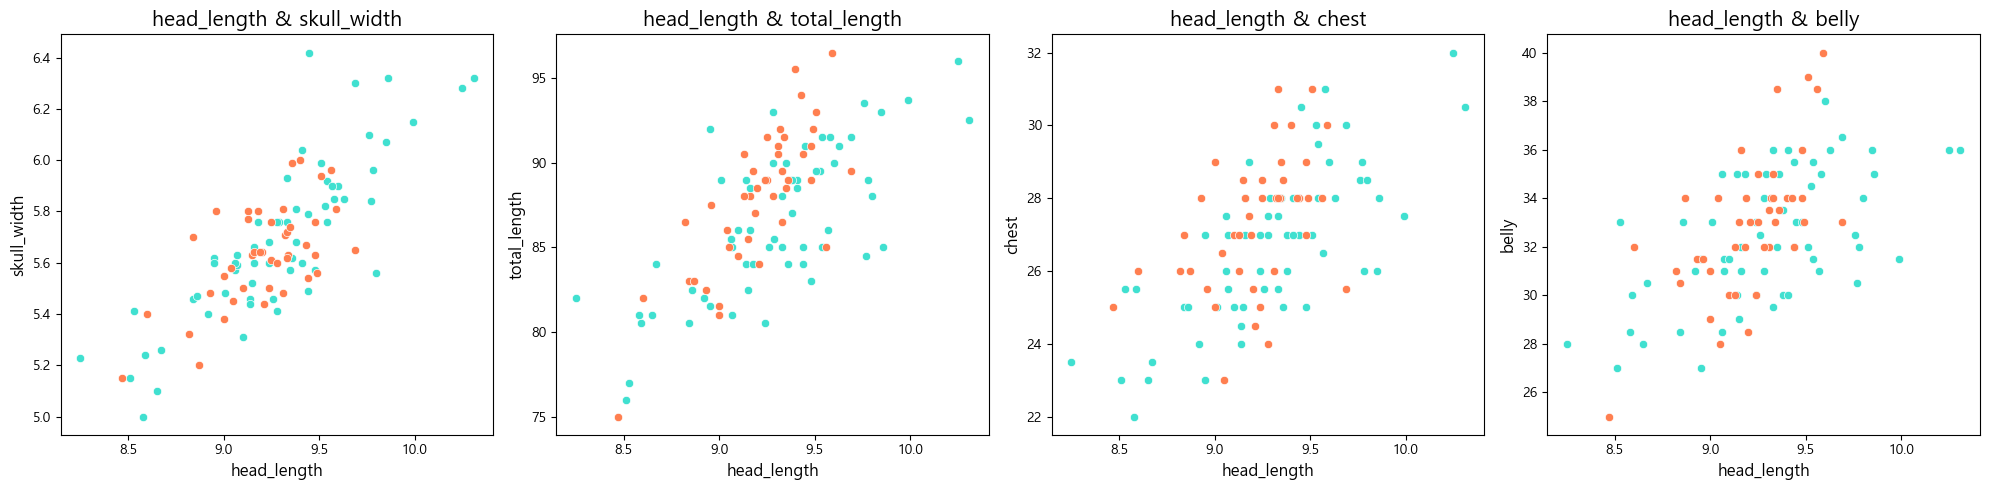

In [21]:
index1 = ['skull_width','total_length','chest','belly']

plt.figure(figsize= (20,5))

for i in range(len(index1)) :
    plt.subplot(1,4,i+1)
    sns.scatterplot(x= 'head_length', y= index1[i], data= df_m, color= 'turquoise')
    sns.scatterplot(x= 'head_length', y= index1[i], data= df_f, color= 'coral')
    plt.title('head_length & {}'.format(index1[i]), fontsize= 15)
    plt.xlabel('head_length', fontsize= 12)
    plt.ylabel(index1[i], fontsize= 12)
    plt.tight_layout()
    
plt.show()

#### skull_width & Features

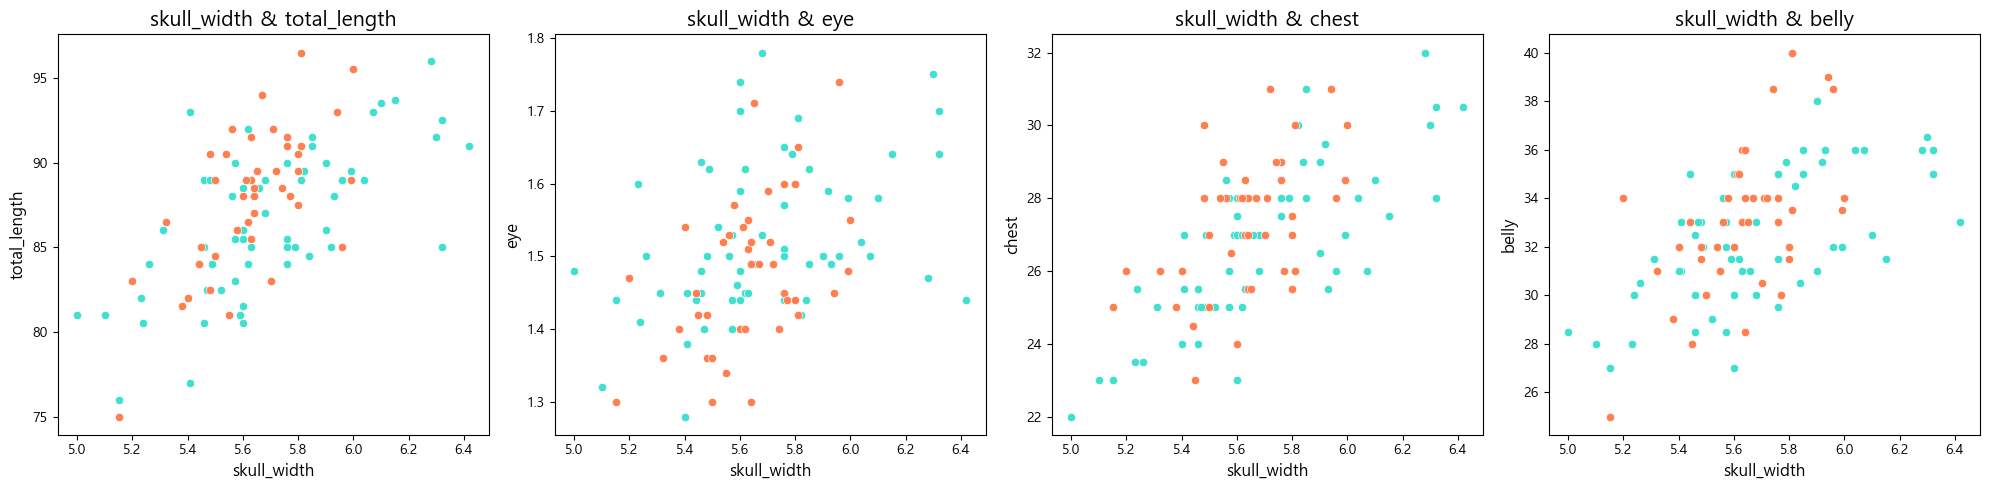

In [22]:
index2 = ['total_length','eye','chest','belly']

plt.figure(figsize= (20,5))

for i in range(len(index2)) :
    plt.subplot(1,4,i+1)
    sns.scatterplot(x= 'skull_width', y= index2[i], data= df_m, color= 'turquoise')
    sns.scatterplot(x= 'skull_width', y= index2[i], data= df_f, color= 'coral')
    plt.title('skull_width & {}'.format(index2[i]), fontsize= 15)
    plt.xlabel('skull_width', fontsize= 12)
    plt.ylabel(index2[i], fontsize= 12)
    plt.tight_layout()
    
plt.show()

# Missing Data

In [23]:
df_null = df.isna().sum()
(df_null / len(df) * 100).round(2).sort_values(ascending = False)

age             1.96
foot_length     0.98
site            0.00
sex             0.00
head_length     0.00
skull_width     0.00
total_length    0.00
tail_length     0.00
eye             0.00
chest           0.00
belly           0.00
dtype: float64

In [24]:
df[df['age'].isnull()]

,age,site,sex,head_length,skull_width,total_length,tail_length,foot_length,eye,chest,belly
43,NaN,2,m,8.51,5.15,76.0,35.5,7.03,1.44,23.0,27.0
45,NaN,2,m,9.14,5.44,84.0,35.0,7.28,1.44,24.5,35.0


In [25]:
df[(df['site'] == 2) & (df['sex'] == 'm')]

,age,site,sex,head_length,skull_width,total_length,tail_length,foot_length,eye,chest,belly
33,2.0,2,m,9.06,5.57,85.5,36.5,7.31,1.44,26.0,28.5
34,4.0,2,m,9.44,5.79,85.0,35.5,7.12,1.64,28.0,35.5
35,7.0,2,m,9.33,5.93,88.0,35.0,7.43,1.49,25.5,36.0
37,7.0,2,m,9.24,5.60,80.5,35.5,6.84,1.59,27.0,30.0
41,3.0,2,m,8.53,5.41,77.0,32.0,6.27,1.38,25.5,33.0
43,NaN,2,m,8.51,5.15,76.0,35.5,7.03,1.44,23.0,27.0
44,3.0,2,m,9.07,5.59,81.0,34.0,7.15,1.46,27.0,31.5
45,NaN,2,m,9.14,5.44,84.0,35.0,7.28,1.44,24.5,35.0


In [26]:
df[df['foot_length'].isnull()]

,age,site,sex,head_length,skull_width,total_length,tail_length,foot_length,eye,chest,belly
40,5.0,2,f,8.84,5.7,83.0,36.5,NaN,1.59,27.0,30.5


In [27]:
df[(df['site'] == 2) & (df['sex'] == 'f')]

,age,site,sex,head_length,skull_width,total_length,tail_length,foot_length,eye,chest,belly
36,2.0,2,f,8.93,5.48,82.5,35.0,7.12,1.36,28.0,31.5
38,1.0,2,f,8.47,5.15,75.0,34.0,6.87,1.30,25.0,25.0
39,3.0,2,f,9.10,5.50,84.5,36.0,7.28,1.36,27.0,30.0
40,5.0,2,f,8.84,5.70,83.0,36.5,NaN,1.59,27.0,30.5
42,2.0,2,f,9.00,5.55,81.0,32.0,7.20,1.34,29.0,31.0


## Encoding

In [28]:
df_dummy = pd.get_dummies(df)
print(df.shape, df_dummy.shape)

(102, 11) (102, 18)


## KNNImputer

In [29]:
from sklearn.impute import KNNImputer

In [30]:
imputer = KNNImputer(n_neighbors= 3)
df_dummy_knn = imputer.fit_transform(df_dummy)
df_dummy_knn = pd.DataFrame(df_dummy_knn, columns= df_dummy.columns)
print(df_dummy_knn.isna().sum())
print('')
df_dummy_knn.head(3)

age             0
head_length     0
skull_width     0
total_length    0
tail_length     0
foot_length     0
eye             0
chest           0
belly           0
site_1          0
site_2          0
site_3          0
site_4          0
site_5          0
site_6          0
site_7          0
sex_f           0
sex_m           0
dtype: int64



,age,head_length,skull_width,total_length,tail_length,foot_length,eye,chest,belly,site_1,site_2,site_3,site_4,site_5,site_6,site_7,sex_f,sex_m
0,8.0,9.41,6.04,89.0,36.0,7.45,1.52,28.0,36.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,6.0,9.25,5.76,91.5,36.5,7.25,1.60,28.5,33.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,6.0,9.40,6.00,95.5,39.0,7.54,1.55,30.0,34.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Target, Features

In [31]:
Y = df_dummy_knn['age']
X = df_dummy_knn.drop('age', axis= 1)
print(X.shape, Y.shape)

(102, 17) (102,)


# Data Split

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size= 0.3,
                                                    shuffle= True,
                                                    random_state= 7)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(71, 17) (31, 17)
(71,) (31,)


# Modeling

In [34]:
# StandardScaler
from sklearn.preprocessing import StandardScaler
# Pipeline
from sklearn.pipeline import Pipeline
# Machine Learning Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor, RandomForestRegressor
# GridSearchCV
from sklearn.model_selection import GridSearchCV

## Pipeline & Voting

In [35]:
pipe_list = [('scaler', StandardScaler()),
             ('model', VotingRegressor(estimators= [('DT', DecisionTreeRegressor()),
                                                    ('RF', RandomForestRegressor())]))]
pipe_model = Pipeline(pipe_list)

### Hyper Parameter

In [36]:
hp = {'model__DT__max_depth':range(2,11,2),
      'model__DT__min_samples_split':[2,3],
      'model__DT__min_samples_leaf':[1,2],
      'model__RF__n_estimators':[100],
      'model__RF__max_depth':range(2,11,2),
      'model__RF__min_samples_split':[2,3],
      'model__RF__min_samples_leaf':[1,2]}

### GridSearchCV

In [37]:
import time
start_time = time.time()

grid_model = GridSearchCV(pipe_model,
                          param_grid= hp,
                          cv= 3,
                          n_jobs= -1,
                          scoring= 'neg_mean_squared_error')
grid_model.fit(X_train, Y_train)

print('수행 시간 : {:.0f} 분 {:.0f} 초\n'.format((time.time() - start_time) // 60, (time.time() - start_time) % 60))

수행 시간 : 0 분 23 초



## Evaluation

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [39]:
train_pred = grid_model.predict(X_train)
test_pred = grid_model.predict(X_test)

# MSE
train_mse = mean_squared_error(Y_train, train_pred)
test_mse = mean_squared_error(Y_test, test_pred)
# MAE
train_mae = mean_absolute_error(Y_train, train_pred)
test_mae = mean_absolute_error(Y_test, test_pred)
# RMSE
train_rmse = mean_squared_error(Y_train, train_pred, squared= False)
test_rmse = mean_squared_error(Y_test, test_pred, squared= False)

In [40]:
print('MSE')
print('Train : {:.4f}\tTest : {:.4f}'.format(train_mse, test_mse))

print('\nMAE')
print('Train : {:.4f}\tTest : {:.4f}'.format(train_mae, test_mae))

print('\nRMSE')
print('Train : {:.4f}\tTest : {:.4f}'.format(train_rmse, test_rmse))

MSE
Train : 1.4433	Test : 2.5028

MAE
Train : 0.9305	Test : 1.3190

RMSE
Train : 1.2014	Test : 1.5820
